教程地址：https://stackoverflow.com/questions/43331510/how-to-train-an-svm-classifier-on-a-satellite-image-using-python

In [44]:
import numpy as np
from skimage import io

# img = io.imread('https://i.sstatic.net/TFOv7.png')
img = io.imread('D:\Projects\VsCode\Python\img_processing_system\img\TFOv7.png')
print(img.shape)
rows, cols, bands = img.shape
print(rows, cols, bands)
classes = {'building': 0, 'vegetation': 1, 'water': 2}
n_classes = len(classes)
palette = np.uint8([
    [0, 255, 0], 
    [255, 0, 0], 
    [0, 0, 255]
    ])

(300, 300, 3)
300 300 3


In [38]:
print(palette)

[[  0 255   0]
 [255   0   0]
 [  0   0 255]]


In [39]:
from sklearn.cluster import KMeans

X = img.reshape(rows*cols, bands)
print("X.shape: ",X.shape)
kmeans = KMeans(n_clusters=n_classes, random_state=3).fit(X)
print(kmeans.labels_)
print(np.unique(kmeans.labels_))
unsupervised = kmeans.labels_.reshape(rows, cols)
print(unsupervised)

X.shape:  (90000, 3)
[1 0 0 ... 1 1 1]
[0 1 2]
[[1 0 0 ... 2 2 2]
 [1 2 0 ... 2 2 2]
 [1 0 1 ... 2 2 2]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [40]:
print(type(palette[unsupervised]))
print(palette[unsupervised].shape)
print(palette[unsupervised])


<class 'numpy.ndarray'>
(300, 300, 3)
[[[255   0   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [  0   0 255]
  [  0 255   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255   0   0]
  [  0 255   0]
  [255   0   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [255   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


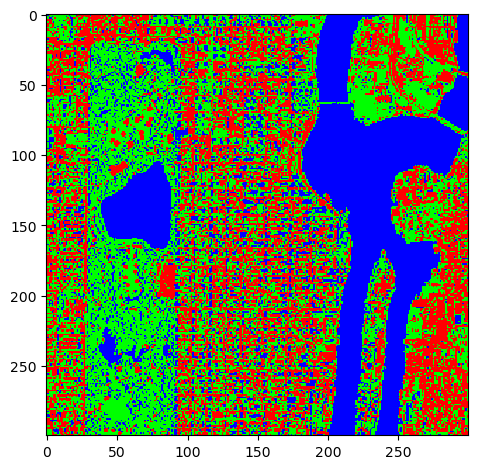

In [41]:
io.imshow(palette[unsupervised])

# 监督学习

In [42]:
supervised = n_classes * np.ones(shape=(rows, cols), dtype=int)
supervised[200:220, 150:170] = classes['building']
supervised[40:60, 40:60] = classes['vegetation']
supervised[100:120, 200:220] = classes['water']

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[12040, 12041, 12042, 12043, 12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055, 12056, 12057, 12058, 12059, 12340, 12341, 12342, 12343, 12344, 12345, 12346, 12347, 12348, 12349, 12350, 12351, 12352, 12353, 12354, 12355, 12356, 12357, 12358, 12359, 12640, 12641, 12642, 12643, 12644, 12645, 12646, 12647, 12648, 12649, 12650, 12651, 12652, 12653, 12654, 12655, 12656, 12657, 12658, 12659, 12940, 12941, 12942, 12943, 12944, 12945, 12946, 12947, 12948, 12949, 12950, 12951, 12952, 12953, 12954, 12955, 12956, 12957, 12958, 12959, 13240, 13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248, 13249, 13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13258, 13259, 13540, 13541, 13542, 13543, 13544, 

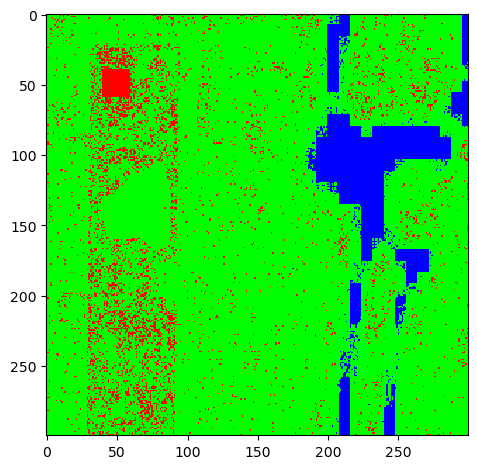

In [43]:
y = supervised.ravel() # 拉伸为1维
train = np.flatnonzero(supervised < n_classes) # 即找到标记为building，vegetation，water的下标
print(supervised < n_classes)
res = (supervised < n_classes).ravel()
idx_list = []
for i in range(0, len(res)):
    if(res[i]):
        idx_list.append(i)
print(idx_list)
print(train)

test = np.flatnonzero(supervised == n_classes) # 即没有被标记为building，vegetation，water的下标

from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X[train], y[train])
y[test] = clf.predict(X[test])
supervised = y.reshape(rows, cols)

io.imshow(palette[supervised])